In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import datetime as dt
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv("profiles.csv")

In [3]:

print(df.offspring.value_counts().keys().tolist())
print(df.offspring.head(10))

['doesn&rsquo;t have kids', 'doesn&rsquo;t have kids, but might want them', 'doesn&rsquo;t have kids, but wants them', 'doesn&rsquo;t want kids', 'has kids', 'has a kid', 'doesn&rsquo;t have kids, and doesn&rsquo;t want any', 'has kids, but doesn&rsquo;t want more', 'has a kid, but doesn&rsquo;t want more', 'has a kid, and might want more', 'wants kids', 'might want kids', 'has kids, and might want more', 'has a kid, and wants more', 'has kids, and wants more']
0    doesn&rsquo;t have kids, but might want them
1    doesn&rsquo;t have kids, but might want them
2                                             NaN
3                         doesn&rsquo;t want kids
4                                             NaN
5    doesn&rsquo;t have kids, but might want them
6                                             NaN
7         doesn&rsquo;t have kids, but wants them
8                         doesn&rsquo;t have kids
9                                             NaN
Name: offspring, dtype: object


In [4]:
print(df.sex.value_counts())

m    35829
f    24117
Name: sex, dtype: int64


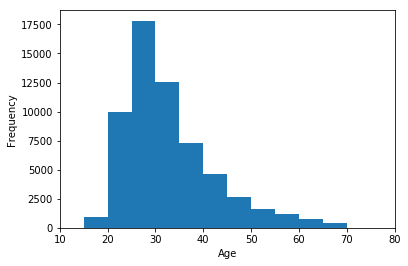

In [5]:
plt.hist(df.age, bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(10, 80)
plt.show()

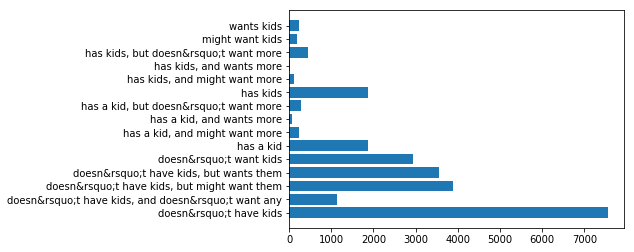

In [75]:
plt.barh(df.offspring.value_counts().keys().tolist(), df.offspring.value_counts().tolist())
plt.show()

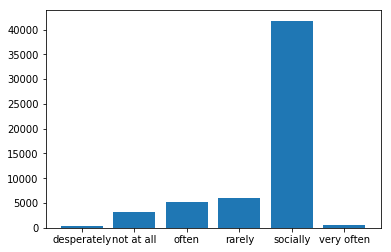

In [7]:
plt.bar(df.drinks.value_counts().keys().tolist(), df.drinks.value_counts().tolist())
plt.show()

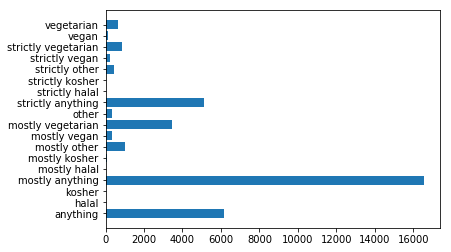

In [8]:
plt.barh(df.diet.value_counts().keys().tolist(), df.diet.value_counts().tolist())
plt.show()

In [9]:
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
df["drinks_code"] = df.drinks.map(drink_mapping)

drugs_mapping = {"never": 0, "sometimes": 1, "often": 2}
df["drugs_code"] = df.drugs.map(drugs_mapping)

smokes_mapping = {"no": 0, "sometimes": 1, "when drinking": 2, "yes": 3, "trying to quit": 4}
df["smokes_code"] = df.smokes.map(smokes_mapping)

gender_mapping ={"m": 0, "f": 1}
df["is_female"] = df.sex.map(gender_mapping)

In [10]:
df.drinks_code.value_counts()

2.0    41780
1.0     5957
3.0     5164
0.0     3267
4.0      471
5.0      322
Name: drinks_code, dtype: int64

In [11]:
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]
all_essays = df[essay_cols].replace(np.nan, '', regex=True)
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)
df["essay_len"] = all_essays.apply(lambda x: len(x))

In [12]:
has_kids_mapping = {"doesn&rsquo;t have kids": 0,
                    "doesn&rsquo;t have kids, but might want them": 0,
                    "doesn&rsquo;t have kids, but wants them":0,
                    "doesn&rsquo;t want kids":0,
                    "has kids": 1,
                    "has a kid": 1,
                    "doesn&rsquo;t have kids, and doesn&rsquo;t want any": 0,
                    "has kids, but doesn&rsquo;t want more":1,
                    "has a kid, but doesn&rsquo;t want more":1,
                    "has a kid, and might want more":1,
                    "wants kids":0,
                    "might want kids":0,
                    "has kids, and might want more":1,
                    "has a kid, and wants more":1,
                    "has kids, and wants more":1}
                    
df["has_kids"] = df.offspring.map(has_kids_mapping)
print(df.has_kids.value_counts())
print(df.has_kids.head())
print(len(df.has_kids))

0.0    19466
1.0     4919
Name: has_kids, dtype: int64
0    0.0
1    0.0
2    NaN
3    0.0
4    NaN
Name: has_kids, dtype: float64
59946


In [13]:
feature_data = df[['height','smokes_code', 'drinks_code', 'drugs_code', 'age', 'is_female', 'has_kids', 'essay_len', 'income']]
kids_data = df[['has_kids','age', 'income', 'essay_len']]


In [14]:
kids_data_clean = kids_data.dropna(axis=0, how='any')
kids_features = kids_data_clean[['age', 'income', 'essay_len']]
kids_values = kids_data_clean['has_kids']

print(kids_features.head())
print(kids_values.head())

   age  income  essay_len
0   22      -1       2644
1   35   80000       1453
3   23   20000        477
5   29      -1       2469
7   31      -1       1240
0    0.0
1    0.0
3    0.0
5    0.0
7    0.0
Name: has_kids, dtype: float64


In [16]:
x = kids_features.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

kids_features = pd.DataFrame(x_scaled, columns=kids_features.columns, copy=False)
kids_values = kids_values.reset_index(drop=True)

c:\python27\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
train_features, test_features, train_labels, test_labels = train_test_split(kids_features, kids_values, train_size=0.8, test_size=0.2, random_state=1)

print train_features.head()
print train_labels.head()

            age  income  essay_len
2368   0.076923     0.0   0.012382
19014  0.010989     0.0   0.015893
4197   0.098901     0.0   0.030270
22792  0.208791     0.0   0.034778
21043  0.109890     0.0   0.012309
2368     0.0
19014    0.0
4197     0.0
22792    0.0
21043    0.0
Name: has_kids, dtype: float64


In [18]:
kids_classifier = KNeighborsClassifier(n_neighbors = 58)
kids_classifier.fit(train_features, train_labels)
print(kids_classifier.score(test_features, test_labels))

0.839450481854


In [ ]:
num_clusters = list(range(1, 300))
scores = []
for i in num_clusters:
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_features, train_labels)
    scores.append(model.score(test_features, test_labels))
print(scores)

In [ ]:
plt.plot(num_clusters, scores, '-o')
plt.show()
print(scores.index(max(scores)))

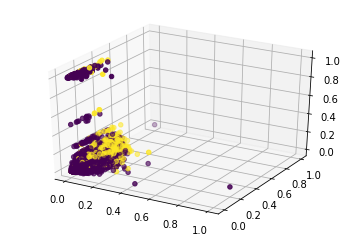

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(train_features.essay_len, train_features.age, train_features.income, c=train_labels)
plt.show()

In [20]:
kids_vector = SVC(kernel = 'linear', gamma = 100, C=100)
kids_vector.fit(train_features, train_labels)
print(kids_vector.score(test_features, test_labels))

0.838220217347


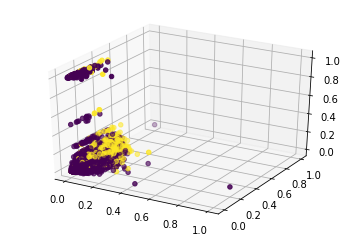

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(train_features.essay_len, train_features.age, train_features.income, c=train_labels)
plt.show()

In [37]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print(accuracy_score(test_labels, kids_classifier.predict(test_features)))
print(recall_score(test_labels, kids_classifier.predict(test_features)))
print(precision_score(test_labels, kids_classifier.predict(test_features)))
print(f1_score(test_labels, kids_classifier.predict(test_features)))

0.839450481854
0.446043165468
0.6401179941
0.525741974561


In [63]:
feature_data_clean = feature_data.dropna(axis=0, how='any')
age_features = feature_data_clean[['smokes_code', 'drinks_code', 'drugs_code', 'height', 'has_kids',  'income', 'essay_len']]
age_values = feature_data_clean['age']

print(age_features.head())
print(age_values.head())

    smokes_code  drinks_code  drugs_code  height  has_kids  income  essay_len
0           1.0          2.0         0.0    75.0       0.0      -1       2644
1           0.0          3.0         1.0    70.0       0.0   80000       1453
7           0.0          2.0         0.0    65.0       0.0      -1       1240
14          0.0          2.0         0.0    62.0       0.0   50000       2609
17          0.0          2.0         0.0    64.0       0.0      -1       4241
0     22
1     35
7     31
14    29
17    26
Name: age, dtype: int64


In [64]:
age_x = age_features.values
min_max_scaler = MinMaxScaler()
age_features_scaled = min_max_scaler.fit_transform(age_x)

age_features = pd.DataFrame(age_features_scaled, columns=age_features.columns, copy=False)
age_values = age_values.reset_index(drop=True)

In [65]:
print(age_features.head())

   smokes_code  drinks_code  drugs_code    height  has_kids    income  \
0         0.25          0.4         0.0  0.661017       0.0  0.000000   
1         0.00          0.6         0.5  0.576271       0.0  0.080001   
2         0.00          0.4         0.0  0.491525       0.0  0.000000   
3         0.00          0.4         0.0  0.440678       0.0  0.050001   
4         0.00          0.4         0.0  0.474576       0.0  0.000000   

   essay_len  
0   0.027372  
1   0.015000  
2   0.012787  
3   0.027008  
4   0.043961  


In [66]:
age_train_features, age_test_features, age_train_labels, age_test_labels = train_test_split(age_features, age_values, train_size=0.8, test_size=0.2, random_state=1)

print age_test_features.head()
print age_test_labels.head()

       smokes_code  drinks_code  drugs_code    height  has_kids    income  \
5694          0.00          0.4         0.0  0.559322       0.0  0.030001   
7926          0.00          0.4         0.5  0.610169       0.0  0.050001   
8002          0.00          0.2         0.0  0.474576       0.0  0.020001   
1304          0.25          0.4         0.0  0.440678       0.0  0.000000   
13644         0.75          0.2         0.0  0.559322       0.0  0.050001   

       essay_len  
5694    0.052312  
7926    0.013847  
8002    0.022811  
1304    0.004425  
13644   0.000540  
5694     23
7926     50
8002     22
1304     20
13644    29
Name: age, dtype: int64


In [67]:
lm = LinearRegression()
lm.fit(age_train_features, age_train_labels)
print(lm.score(age_test_features, age_test_labels))
print(lm.coef_)

0.313702813433
[ -4.75566304  -3.42108596  -3.79203131  -0.36410736  14.13549994
   0.22338987  30.08253701]


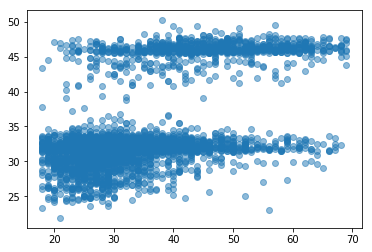

In [68]:
plt.scatter(age_test_labels, lm.predict(age_test_features), alpha=0.5)
plt.show()

In [69]:
regressor = KNeighborsRegressor(n_neighbors = 2000, weights = "distance")
regressor.fit(age_train_features, age_train_labels)
print(regressor.score(age_test_features, age_test_labels))

0.294227816938


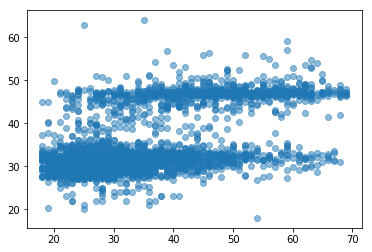

In [70]:
plt.scatter(age_test_labels, regressor.predict(age_test_features), alpha = 0.5)
plt.show()

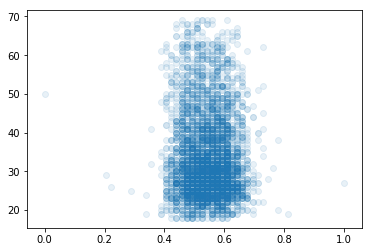

In [77]:
plt.scatter(age_test_features['height'], age_test_labels, alpha = 0.1)

NameError: name 'k_regressor' is not defined

0.213543040511


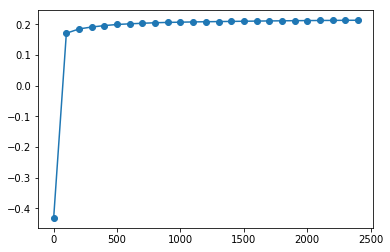

24


In [76]:
k = list(range(1, 2500, 100))
k_scores = []
for i in k:
    k_regressor = KNeighborsRegressor(n_neighbors = i, weights = "distance")
    k_regressor.fit(train_features, train_labels)
    k_scores.append(k_regressor.score(test_features, test_labels))

print(max(k_scores))

plt.plot(k, k_scores, '-o')
plt.show()
print(k_scores.index(max(k_scores)))